<a href="https://colab.research.google.com/github/tankalasaiambica/Customer-Churn-Prediction-using-RandomForest/blob/main/Customer_Churn_Prediction_using_RandomForest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,cross_validate
from sklearn.preprocessing  import LabelEncoder,OneHotEncoder,OrdinalEncoder

# Understanding Problem Statement
Decreasing the Customer Churn is a key goal for any business. Predicting Customer Churn (also known as Customer Attrition) represents an additional potential revenue source for any business. Customer Churn impacts the cost to the business. Higher Customer Churn leads to loss in revenue and the additional marketing costs involved with replacing those customers with new ones. 

In this challenge, as a data scientist of a bank, you are asked to analyze the past data and predict whether the customer will churn or not in the next 6 months. This would help the bank to have the right engagement with customers at the right time.

loading the data

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/analyticsvidhya/train_PDjVQMB.csv")
test_data = pd.read_csv("/content/drive/MyDrive/analyticsvidhya/test_lTY72QC.csv")

In [ ]:
train_data.head() # first five rows

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [ ]:
train_data.tail()# last five rows

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
6645,a8216afd,61,Male,5L - 10L,1354526.19,4,1,2,1,Poor,1
6646,153a306b,42,Female,5L - 10L,596286.54,3,1,2,1,Average,0
6647,d4075a95,29,Male,Less than 5L,979298.19,2,0,2,0,Poor,0
6648,5855b142,66,Female,10L - 15L,395233.65,3,0,2,1,Poor,1
6649,57b39511,37,Male,More than 15L,826947.27,1,1,2,0,Good,0


In [ ]:
test_data.head() # first five rows

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good


In [ ]:
test_data.tail() # last five rows

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
2846,19e40adf,40,Female,10L - 15L,1338458.22,0,0,1,1,Poor
2847,52d5bc8d,48,Female,More than 15L,1448280.27,0,1,2,1,Average
2848,f708121b,59,Male,More than 15L,1100555.64,3,0,1,1,Poor
2849,f008715d,34,Female,5L - 10L,1502818.92,2,0,1,1,Poor
2850,36b81f59,61,Female,10L - 15L,913787.73,0,1,2,1,Good


In [ ]:
# shape of the datasets
print("train_data shape:",train_data.shape)
print("test_data shape:",test_data.shape)

train_data shape: (6650, 11)
test_data shape: (2851, 10)


In [ ]:
#info of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


Here we can see that they are no null values in the dataframe

 # Exploratory data analysis

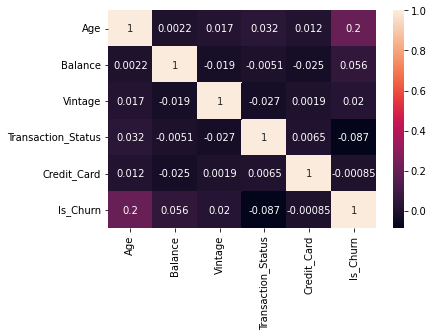

In [ ]:
corr = train_data.corr()
sns.heatmap(corr,annot = True)

0    5113
1    1537
Name: Is_Churn, dtype: int64


[Text(0.5, 1.0, 'count of Is_churn')]

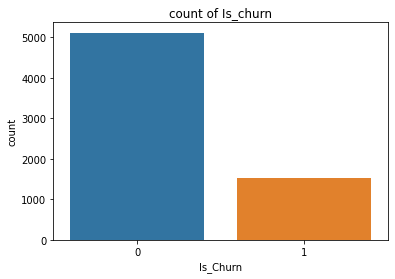

In [ ]:
print(train_data['Is_Churn'].value_counts())
sns.countplot(x="Is_Churn", data=train_data).set(title='count of Is_churn')

By above plot we can see the given data is imbalance dataset 

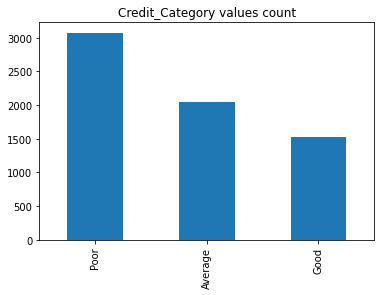

In [ ]:
train_data['Credit_Category'].value_counts().plot(kind = 'bar',title ="Credit_Category values count" )

here we can see a poor ranking in Credit_Category  more so most of the people are not paying the credit 

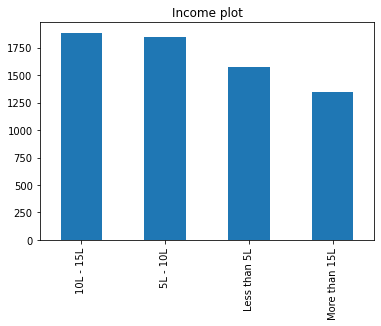

In [ ]:
train_data['Income'].value_counts().plot(kind = 'bar',title ="Income plot")


Here we can see that the Income column is in object datatype which we need to convert to interger datatype for futher calculations 

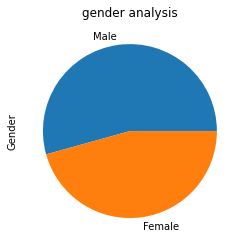

In [ ]:
train_data['Gender'].value_counts().plot(kind = 'pie',title ="gender analysis")

male count is more then the female count

In [ ]:
train_data[["Age","Balance"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,6650.0,41.130226,9.685747,21.0,34.0000,40.000,47.00,72.00
Balance,6650.0,804595.354985,515754.867315,63.0,392264.2125,764938.575,1147123.71,2436615.81


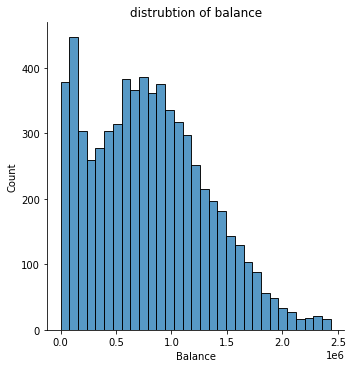

In [ ]:
sns.displot(train_data['Balance']).set(title='distrubtion of balance')

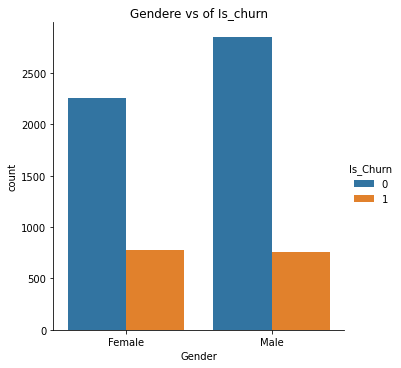

In [ ]:
sns.catplot(x='Gender', hue = 'Is_Churn', kind='count', data=train_data).set(title='Gendere vs of Is_churn')

seens like count of Is_churn in males and females is mostly same

Here as to see which age group of customers are being churn we are grouping the age and target column and dividing the age into less then 34 as 0 gt 34 and lt 57 as 1 and gt 57 as 2  

In [ ]:
new_df = train_data[['Age','Is_Churn']] # creating the new dataframe
new_df.head()

,Age,Is_Churn
0,36,1
1,53,0
2,35,0
3,43,1
4,39,1


In [ ]:
# dividing the age into three groups and mapping as 0,1,2
new_df.loc[(new_df['Age'] <= 34), 'age_group'] = 0
new_df.loc[(new_df['Age'] > 34)&(new_df['Age'] < 57 ), 'age_group'] = 1
new_df.loc[(new_df['Age'] >= 57), 'age_group'] = 2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
new_df.head()

,Age,Is_Churn,age_group
0,36,1,1.0
1,53,0,1.0
2,35,0,1.0
3,43,1,1.0
4,39,1,1.0


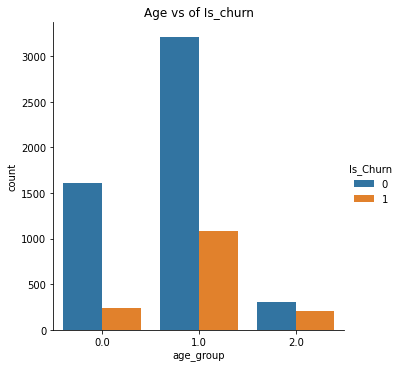

In [ ]:
sns.catplot(x='age_group', hue = 'Is_Churn', kind='count', data=new_df).set(title='Age vs of Is_churn')

From above we can see that the customers from age group 34 to 57 are having high churn rate

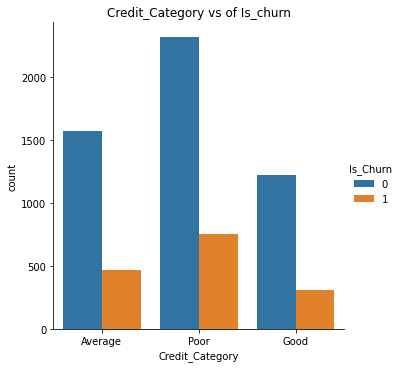

In [ ]:
sns.catplot(x='Credit_Category', hue = 'Is_Churn', kind='count', data=train_data).set(title='Credit_Category vs of Is_churn')

From above we can see that the  customers of Credit_Category type poor is having high churn rate

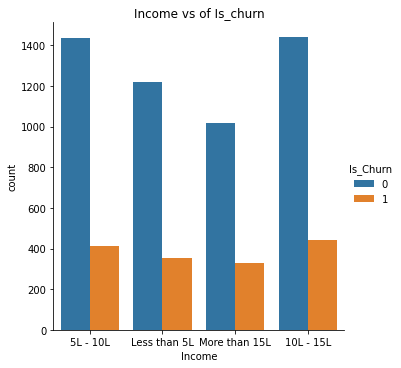

In [ ]:
sns.catplot(x='Income', hue = 'Is_Churn', kind='count', data=train_data).set(title='Income vs of Is_churn')


From above we can see that there is having high churn rate in customers who earn in 5L-10L and 10L-15L then compared to other two

Now we using the p-test to see which variable is most effect the target column

In [ ]:
import statsmodels.api as sm

## X is the input variables (or independent variables)
X = train_data['Vintage']
## y is the target/dependent variable
y = train_data['Is_Churn']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Is_Churn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.701
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.100
Time:                        10:33:28   Log-Likelihood:                -3690.3
No. Observations:                6650   AIC:                             7385.
Df Residuals:                    6648   BIC:                             7398.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2180      0.010     22.943      0.000       0.199       0.237
Vintage        0.0058      0.004      1.643      0.100      -0.001       0.013
==============================================================================
Omnibus:                     1176.937   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1839.741
Skew:                           1.275   Prob(JB):                         0.00
Kurtosis:                       2.628   Cond. No.                         5.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we got the p value greater than 0.5 we can say that Vintage is effecting the Is_Churn

In [ ]:
X = train_data['Transaction_Status']
## y is the target/dependent variable
y = train_data['Is_Churn']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Is_Churn   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     50.61
Date:                Fri, 11 Mar 2022   Prob (F-statistic):           1.25e-12
Time:                        10:33:28   Log-Likelihood:                -3666.4
No. Observations:                6650   AIC:                             7337.
Df Residuals:                    6648   BIC:                             7350.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2689      0.007     36.334      0.000       0.254       0.283
Transaction_Status    -0.0733      0.010     -7.114      0.000      -0.094      -0.053
==============================================================================
Omnibus:                     1158.236   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1799.885
Skew:                           1.261   Prob(JB):                         0.00
Kurtosis:                       2.633   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we got the p value less than 0.5 we can say that Transaction_Status is not effecting the Is_Churn

In [ ]:
# LabelEncoder Product_Holdings
# as is a object type we are mapping it to int
train_data['Product_Holdings'] = LabelEncoder().fit_transform(train_data['Product_Holdings'])
test_data['Product_Holdings'] = LabelEncoder().fit_transform(test_data['Product_Holdings'])

In [ ]:
train_data['Product_Holdings'].unique() # printing the unique valaues 

array([0, 1, 2])

In [ ]:
X = train_data['Product_Holdings']
## y is the target/dependent variable
y = train_data['Is_Churn']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Is_Churn   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.300
Date:                Fri, 11 Mar 2022   Prob (F-statistic):             0.0121
Time:                        10:33:28   Log-Likelihood:                -3688.5
No. Observations:                6650   AIC:                             7381.
Df Residuals:                    6648   BIC:                             7395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2438      0.007     33.737      0.000       0.230       0.258
Product_Holdings    -0.0227      0.009     -2.510      0.012      -0.040      -0.005
==============================================================================
Omnibus:                     1175.546   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1836.765
Skew:                           1.274   Prob(JB):                         0.00
Kurtosis:                       2.628   Cond. No.                         2.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we got the p value less than 0.5 we can say that Product_Holdings is not effecting the Is_Churn

In [ ]:
X = train_data['Credit_Card']
## y is the target/dependent variable
y = train_data['Is_Churn']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Is_Churn   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.004782
Date:                Fri, 11 Mar 2022   Prob (F-statistic):              0.945
Time:                        10:33:28   Log-Likelihood:                -3691.6
No. Observations:                6650   AIC:                             7387.
Df Residuals:                    6648   BIC:                             7401.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2316      0.009     25.955      0.000       0.214       0.249
Credit_Card    -0.0008      0.011     -0.069      0.945      -0.022       0.021
==============================================================================
Omnibus:                     1177.991   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1842.000
Skew:                           1.276   Prob(JB):                         0.00
Kurtosis:                       2.627   Cond. No.                         3.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we got the p value greater than 0.5 we can say that Credit_Card is effecting the Is_Churn

# Feature engineering

In [ ]:
# mapping the male to 1 and female to 0
gender = {'Male': 1,'Female': 0}
train_data['Gender']= [gender[item] for item in train_data['Gender']]
test_data['Gender']= [gender[item] for item in test_data['Gender']]

In [ ]:
# print unique values in Income
train_data['Income'].unique()

array(['5L - 10L', 'Less than 5L', 'More than 15L', '10L - 15L'],
      dtype=object)

In [ ]:
# converting this values to int based on the values
Income_values = {'Less than 5L':0,
                 '5L - 10L':1,
                 '10L - 15L':2,
                 'More than 15L':3}

train_data['Income'] = train_data['Income'].map(Income_values)
test_data['Income'] = test_data['Income'].map(Income_values)

In [ ]:
train_data['Credit_Category'].unique()

array(['Average', 'Poor', 'Good'], dtype=object)

In [ ]:
# converting this values to int based on the values
Category = { 'Poor':0,
            'Average':1,
            'Good':2}

train_data['Credit_Category'] = train_data['Credit_Category'].map(Category)
test_data['Credit_Category'] = test_data['Credit_Category'].map(Category)

In [ ]:
train_data.tail() # after converting the values

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
6645,a8216afd,61,1,1,1354526.19,4,1,1,1,0,1
6646,153a306b,42,0,1,596286.54,3,1,1,1,1,0
6647,d4075a95,29,1,0,979298.19,2,0,1,0,0,0
6648,5855b142,66,0,2,395233.65,3,0,1,1,0,1
6649,57b39511,37,1,3,826947.27,1,1,1,0,2,0


In [ ]:
train_data.info() # checking the dattype of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   int64  
 3   Income              6650 non-null   int64  
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   int64  
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   int64  
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 571.6+ KB


We can see that all values are in integer type except the ID

In [ ]:
# droping the ID column
train_data=train_data.drop('ID',axis = 1)

# segregate  the dataframe into X and y


In [ ]:
X= train_data.drop(columns = ['Is_Churn'])
y = train_data["Is_Churn"]

# spliting thr data into train and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=50)
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((4655, 9), (1995, 9), (4655,), (1995,))

# Modelling

using the RandomForestClassifier 

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train) # fitting the model

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test) # prediting the model

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred)) # printing accuracy_score

Accuracy: 0.7644110275689223


In [ ]:
print("f1_score:",f1_score(y_test, y_pred,average="macro")) # printing f1_score

f1_score: 0.5204071820514183


from above we can see that accuracy_score is good and f1_score is not good score that is because we are using the imbalance data

In [ ]:
# confusion matrix
cnf_matrix = cm(y_test, y_pred)
print(cnf_matrix)

[[1474   58]
 [ 412   51]]


# As the given data is a imbalance dataset we get the low f1_score so we are going to use some resampling techniqiues to get the best score

In [ ]:
# using the smote and clustering in combination 
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [ ]:
# resampling the model
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, train_size=0.7, random_state=50)
X_train1.shape, X_test1.shape ,y_train1.shape, y_test1.shape

((1870, 9), (802, 9), (1870,), (802,))

In [ ]:
# For evalution 
def evaluate_model(rtf):
    print("Train Accuracy :", accuracy_score(y_train1, rtf.predict(X_train1)))
    print("Train f1_score:", f1_score(y_train1, rtf.predict(X_train1),average='macro'))
    print("Train Confusion Matrix:")
    print(cm(y_train1, rtf.predict(X_train1)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test1, rtf.predict(X_test1)))
    print("Test f1_score:", f1_score(y_test1, rtf.predict(X_test1),average='macro'))
    print("Test Confusion Matrix:")
    print(cm(y_test1, rtf.predict(X_test1)))


In [ ]:
rft = RandomForestClassifier() # calling the model 

# Hyper parameter tunning for RandomForestClassifier

In [ ]:
params = {
            'max_depth': [2,3,5,10,20],
            'min_samples_leaf': [5,10,20,50,100,200],
            'n_estimators': [10,25,30,50,100,200],
            'max_features': ['auto', 'sqrt'],
            'bootstrap': [True, False]
}


In [ ]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42) # using the StratifiedKFold 

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rft, 
                           param_grid=params, 
                           cv=skf, n_jobs=-1, verbose=1, scoring = "f1_macro")

In [ ]:
grid_search.fit(X_train1, y_train1) # fitting the modle

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_macro', verbose=1)

In [ ]:
grid_search.best_score_ # printing the best score

0.7466917887516799

In [ ]:
y_p = grid_search.predict(X_test1) # predicting the score

In [ ]:
f1_score(y_p,y_test1,average='macro') # check th accuarcy of model using f1_macro 

0.7451038413063729

Now we can see we get the 76 f1 score which is not a bad score

In [ ]:
dt_best = grid_search.best_estimator_ # printing the best parameters

In [ ]:
dt_best

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=25)

In [ ]:
evaluate_model(dt_best) # evaluating the model once again with best parameters 

Train Accuracy : 0.839572192513369
Train f1_score: 0.8393340122736214
Train Confusion Matrix:
[[749 150]
 [150 821]]
--------------------------------------------------
Test Accuracy : 0.7468827930174564
Test f1_score: 0.7451038413063729
Test Confusion Matrix:
[[266 105]
 [ 98 333]]


By see the Confusion Matrix we say it is better then the previous once

In [ ]:
# crating the pickle of the model
import pickle
pickle.dump(grid_search, open('model_rft.pkl','wb'))
# Loading model to compare the results
# model = pickle.load(open('model_rft.pkl','rb'))

In [ ]:
test_df= test_data.drop('ID',axis = 1) # droping thr ID column

In [ ]:
def evaluate_model2(rtf): # predicting with test dataset
  test_pre = rtf.predict(test_df)
  return test_pre

s = evaluate_model2(dt_best)

In [ ]:
s # predicted values

array([0, 1, 0, ..., 1, 1, 0])

In [ ]:
test_data['Is_Churn'] = s # creating new column in test_data Is_Churn and add s to it 

In [ ]:
submission = test_data[['ID','Is_Churn']] # selecting only ID and Is_Churn 

In [ ]:
submission.head() # printing the head of submission

,ID,Is_Churn
0,55480787,0
1,9aededf2,1
2,a5034a09,0
3,b3256702,0
4,dc28adb5,0


In [ ]:
submission.to_csv('submission1.csv', index=False) # creating a submission.csv file